# Imports

In [1]:
import numpy as np
from iminuit.cost import LeastSquares
from iminuit import Minuit
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','no-latex', 'grid']) #ieee, grid

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

from funcs import *
from stats import *
from Fit import *

# Functions

In [2]:
def H_R(w,tau, a):
    return w*tau/np.sqrt(1+np.power(w*tau,2)) + a

def H_C(w,tau, a):
    return 1/np.sqrt(1+np.power(w*tau,2)) + a

def fase_R(w,tau, a):
    return np.arctan(1/(w*tau)) + a

def fase_C(w,tau, a):
    return -np.arctan(w*tau) + a

In [3]:
def H_R_na(w, R, Rg, C ):
    return R/np.sqrt((R+Rg)**2 + np.power((1/(w*C)),2))

def H_C_na(w, R, Rg, C ):
    return 1/np.sqrt( 1 + np.power( w*C*(R+Rg) ,2))

def fase_R_na(w, R, Rg, C, a):
    return np.arctan(1/(w*C*(R+Rg))) + a

def fase_C_na(w, R, Rg, C, a):
    return np.arctan(-w*C*(R+Rg)) + a

# RC

In [4]:
if 1:
    path_folder = 'data.leo/RC/'
    V_res, V_c, fase_res, fase_c = [], [], [], []
    freqs = []
    for i in sorted([int(i) for i in os.listdir(path_folder)]):

        path = path_folder+str(i)+'/'

        CH1,SGN,MTH, V_SGN, V_MTH, zero_CH1, zero_SGN, zero_MTH, m1, m2, m3, dt_CH1, dt_MTH = analize(path, i, force=True, prec=1e-8,verbose=True)
        
        # x=np.linspace(np.min(CH1[0]), np.max(CH1[0]), 100)

        # plt.figure(figsize=(10,4))
        # plt.plot(x, sine(x, **m1.values.to_dict()), label='CH1 fit', color='red')
        # plt.plot(x, sine(x, **m2.values.to_dict()), label='SGN fit', color='blue')
        # plt.plot(x, sine(x, **m3.values.to_dict()), label='MTH fit', color='green')
        
        # # plt.plot(CH1[0], CH1[1], label='CH1', color='red')
        # # plt.plot(SGN[0], SGN[1], label='SGN', color='blue')
        # # plt.plot(MTH[0], MTH[1], label='MTH', color='green')

        # plt.scatter(zero_CH1, 0, color='red', label='zero CH1')
        # plt.scatter(zero_SGN, 0, color='blue', label='zero SGN')
        # plt.scatter(zero_MTH, 0, color='green', label='zero MTH')
        # plt.legend(ncol=2)
        # plt.show()
        # print(i, dt_CH1, dt_MTH)

        V_res.append(V_SGN)
        V_c.append(V_MTH)
        fase_res.append(dt_CH1*i*2*np.pi)
        fase_c.append(dt_MTH*i*2*np.pi)
        freqs.append(i)

    V_res = np.array(V_res)
    V_c = np.array(V_c)
    fase_res = np.array(fase_res)
    fase_c = np.array(fase_c)
    freqs = np.array(freqs)

# Modulo

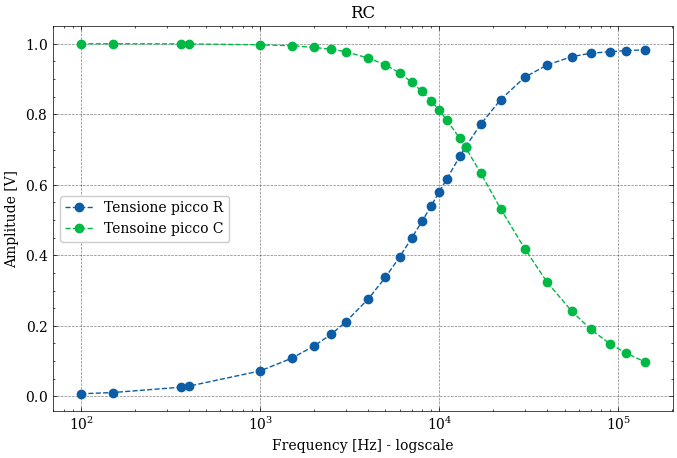

In [5]:
plt.figure(figsize=(8,5))
x = np.linspace(np.min(freqs),np.max(freqs),1000)

# plt.plot(x, H_R(x*2*np.pi, 1e3*12e-9, 0), label='Teorico')
# plt.plot(x, H_C(x*2*np.pi, 1e3*12e-9), label='Teorico')
plt.plot(freqs, V_res, 'o--', label='Tensione picco R')
plt.plot(freqs, V_c, 'o--', label='Tensoine picco C')
plt.title('RC')
plt.xlabel('Frequency [Hz] - logscale')
plt.ylabel('Amplitude [V]')
plt.legend()
plt.xscale('log')
# plt.yscale('log')
plt.show()

## R

C =  1.1551897978198434e-08


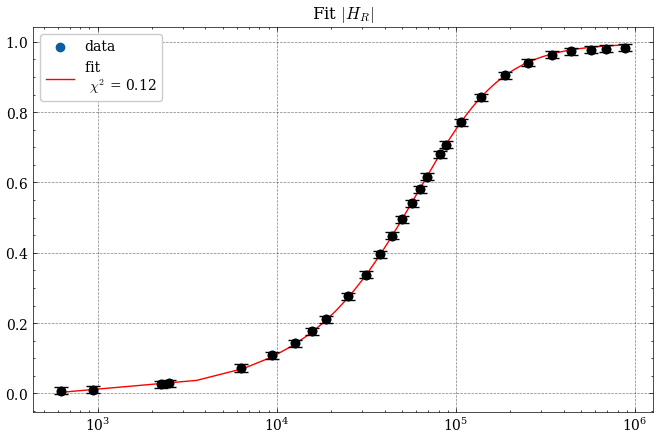

In [6]:
f = Fit(freqs*2*np.pi, V_res, H_R, 0.01, kwargs={'tau':1e3*12e-9, 'a':0.})
f.fit()
fig, ax = f.visualize()
fig.set_size_inches(8,5)
plt.xscale('log')
plt.legend()
plt.title('Fit $|H_R|$')

print("C = ",f.values['tau']/997)

In [7]:
c = LeastSquares(freqs*2*np.pi, V_res, 0.01, H_R)
m = Minuit(c, tau=1e3*12e-9, a=0.)
m.fixed['a'] = True
m.migrad()
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.118 (χ²/ndof = 0.2)      │              Nfcn = 23               │
│ EDM = 7.52e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ tau  │ 11.36e-6  │  0.09e-6  │            │            │         │         │       │
│ 1 │ a    │    0.0    │    0.1    │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬───────────────────┐
│     │      tau        a │
├─────┼───────────────────┤
│ tau │ 8.43e-15    0e-15 │
│   a │    0e-15        0 │
└─────┴───────────────────┘

In [8]:
c = LeastSquares(freqs*2*np.pi, V_res, 0.005, H_R_na)
m = Minuit(c, R=996, Rg=50, C=12e-9)
m.fixed['R', 'Rg', 'C'] = True, False, False
m.migrad()
m.minos()
m.hesse()
# print(m.values['R']+m.values['Rg'])

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.217 (χ²/ndof = 0.1)      │              Nfcn = 78               │
│ EDM = 5.95e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │    996    │    10     │            │            │         │         │  yes  │
│ 1 │ Rg   │    8.6    │    2.1    │    -2.1    │    2.1     │         │         │       │
│ 2 │ C    │ 11.49e-9  │  0.05e-9  │  -0.05e-9  │  0.05e-9   │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          Rg           │           C           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -2.1    │    2.1    │ -0.05e-9  │  0.05e-9  │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬───────────────────────────────────────────────────────┐
│    │                 R                Rg                 C │
├────┼───────────────────────────────────────────────────────┤
│  R │                 0                 0                 0 │
│ Rg │                 0              4.37 39.7605423458e-12 │
│  C │                 0 39.7605423458e-12          2.54e-21 │
└────┴───────────────────────────────────────────────────────┘

## C

{'tau': 7.209930046617722e-05, 'a': -0.0006918321368803598}
C =  7.231624921381868e-08


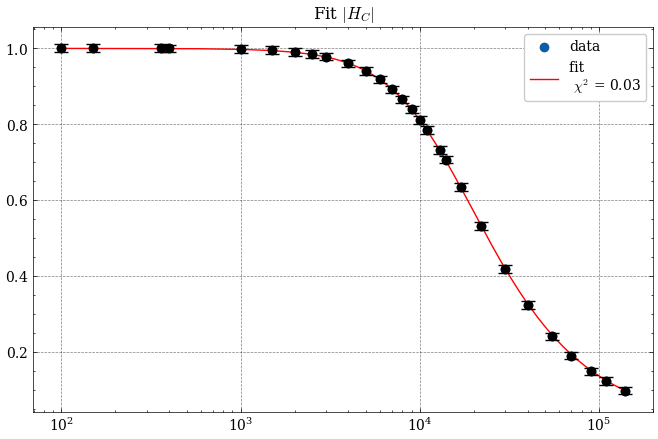

In [9]:
f = Fit(freqs, V_c, H_C, 0.01, kwargs={'tau':1e3*12e-9, 'a':0.})
f.fit()
fig, ax = f.visualize()
fig.set_size_inches(8,5)
plt.xscale('log')
plt.legend()
plt.title('Fit $|H_C|$')

print(f.values)
print("C = ",f.values['tau']/997)

In [10]:
c = LeastSquares(freqs*2*np.pi, V_c, 0.01, H_C_na)
m = Minuit(c, R=996, Rg=17, C=12e-9)
m.fixed['R', 'Rg', 'C'] = True, False, True
m.migrad()
m.hesse()
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.8316 (χ²/ndof = 0.0)     │              Nfcn = 24               │
│ EDM = 2.65e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │    996    │    10     │            │            │         │         │  yes  │
│ 1 │ Rg   │    -37    │     9     │     -9     │     9      │         │         │       │
│ 2 │ C    │ 12.00e-9  │  0.12e-9  │            │            │         │         │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │          Rg           │
├──────────┼───────────┬───────────┤
│  Error   │    -9     │     9     │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌────┬────────────────┐
│    │    R   Rg    C │
├────┼────────────────┤
│  R │    0    0    0 │
│ Rg │    0 74.8    0 │
│  C │    0    0    0 │
└────┴────────────────┘

# Fase

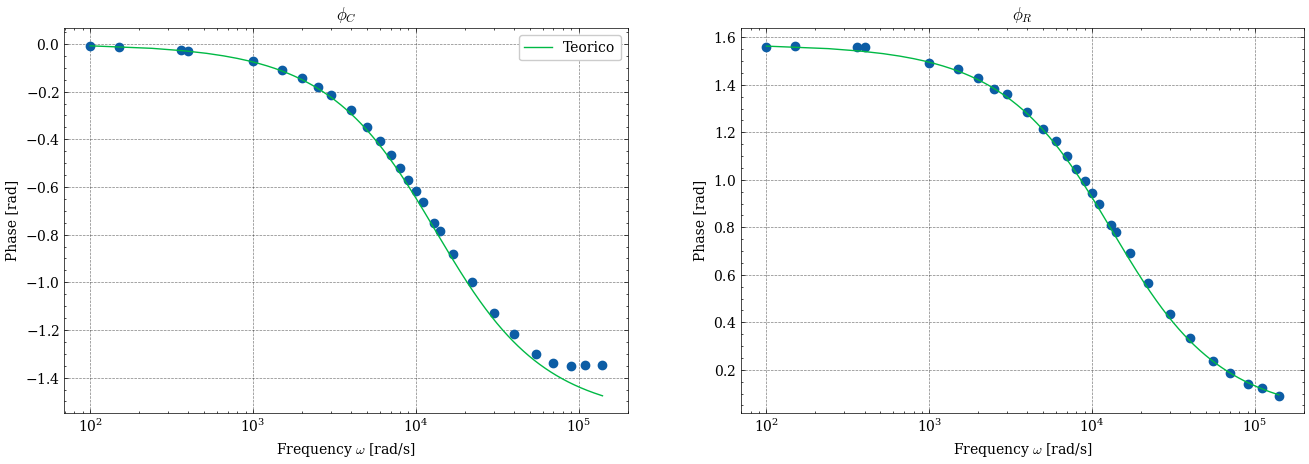

In [11]:
x = np.linspace(np.min(freqs[:]),np.max(freqs[:]),1000)

plt.subplots(1,2,figsize=(16,5))
plt.title('Dati')
plt.subplot(1,2,1)
plt.plot(freqs[:], -fase_c[:],'o', lw=1)
plt.plot(x, fase_C(x*2*np.pi, 1e3*12e-9, 0.), label='Teorico')
plt.title('$\phi_C$')
plt.xlabel('Frequency $\omega$ [rad/s]')
plt.ylabel('Phase [rad]')
plt.legend()
plt.xscale('log')

plt.subplot(1,2,2)
plt.plot(freqs[:], -fase_res[:] + np.pi*2, 'o', lw=1)
plt.plot(x, fase_R(x*2*np.pi, 1e3*12e-9, 0), label='Teorico')
plt.title('$\phi_R$')
plt.xlabel('Frequency $\omega$ [rad/s]')
plt.ylabel('Phase [rad]')
plt.xscale('log')

# plt.savefig('imgs/RC/fasi_no_log.jpeg', bbox_inches='tight', dpi=200)
plt.show()

## R

In [12]:
c = LeastSquares(freqs[2:]*2*np.pi, (-fase_res[2:] + (2*np.pi)), 0.01, fase_R)
m = Minuit(c, tau=1e3*12e-9, a=0.)
m.migrad()
m.hesse()
# print(m.values['tau']/1e3)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.7 (χ²/ndof = 0.5)       │              Nfcn = 49               │
│ EDM = 6.29e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ tau  │ 11.53e-6  │  0.14e-6  │            │            │         │         │       │
│ 1 │ a    │   0.001   │   0.004   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────┐
│     │         tau           a │
├─────┼─────────────────────────┤
│ tau │    2.01e-14 495.037e-12 │
│   a │ 495.037e-12    1.61e-05 │
└─────┴─────────────────────────┘

{'tau': 1.1529415162337472e-05, 'a': 0.0008276911445930146}
{'tau': 7.0929418992583506e-09, 'a': 0.0002005434606457753}
R =  0.960784596861456
180.00600988803063


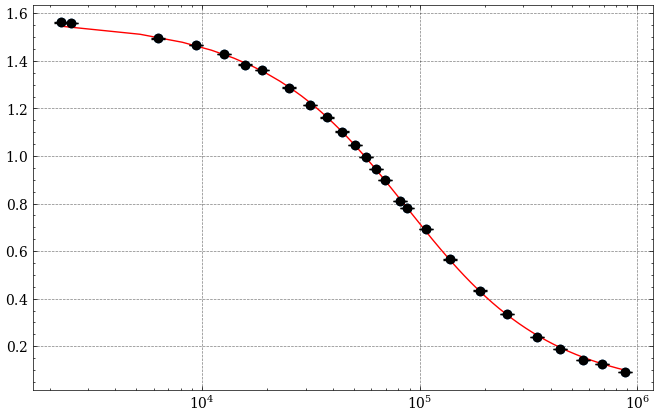

In [14]:
f = Fit(freqs[2:]*2*np.pi, -fase_res[2:]+ 2*np.pi, fase_R, 0.0005, kwargs={'tau':12e-9*1e3, 'a':0})
f.fit()
fig, ax = f.visualize()
fig.set_size_inches(8,5)
print(f.values)
print(f.errors)
print('R = ', f.values['tau']/12e-6)
print(f.fval/f.ndof)
plt.xscale('log')

## C

In [16]:
c = LeastSquares(freqs[2:]*2*np.pi, (-fase_c[2:]), 0.01, fase_C_na)
m = Minuit(c, R=996, Rg=17, C=12e-9, a=0.)
m.fixed['R', 'Rg', 'C'] = True, False, False
m.migrad()
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 226.2 (χ²/ndof = 9.8)      │              Nfcn = 77               │
│ EDM = 1.6e-07 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │    996    │    10     │            │            │         │         │  yes  │
│ 1 │ Rg   │     0     │   1.5e3   │            │            │         │         │       │
│ 2 │ C    │ 0.012e-6  │ 0.017e-6  │            │            │         │         │       │
│ 3 │ a    │   0.036   │   0.004   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────────────────────┐
│    │                  R                 Rg                  C                  a │
├────┼─────────────────────────────────────────────────────────────────────────────┤
│  R │                  0                  0                  0                  0 │
│ Rg │                  0           2.13e+06 -25.26949795665e-6          23.815e-3 │
│  C │                  0 -25.26949795665e-6           2.99e-16         280.96e-15 │
│  a │                  0          23.815e-3         280.96e-15           1.72e-05 │
└────┴─────────────────────────────────────────────────────────────────────────────┘

{'tau': 7.738598663392782e-05, 'a': 0.03628731081381781}
{'tau': 4.727255328365503e-07, 'a': 0.0020051287255525877}
34.8032206047588


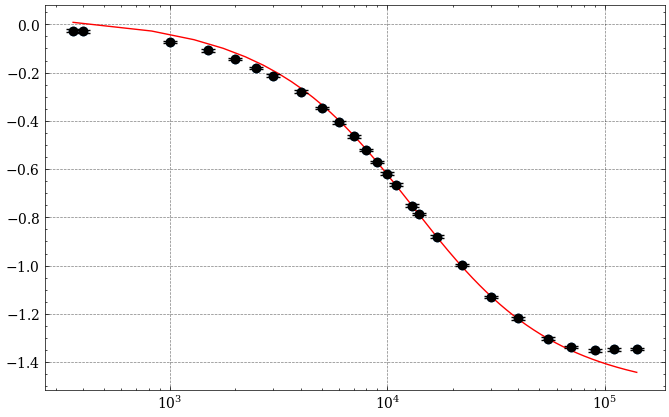

In [17]:
f = Fit(freqs[2:], -fase_c[2:], fase_C, 0.005, kwargs={'tau':12e-6, 'a':0})
f.fit()
fig, ax = f.visualize()
fig.set_size_inches(8,5)
print(f.values)
print(f.errors)
print(f.fval/f.ndof)
plt.xscale('log')